# **EDA FOR GLOBAL TEMPERATURES BY CITIES**


In [172]:
!pip install seaborn==0.11.0

### Importing Libraries

In [173]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 100

sns.set(style="whitegrid")
sns.set_color_codes("pastel")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/global-warming-dataset/DA proj/continents2.csv
/kaggle/input/global-warming-dataset/DA proj/GlobalTemperatures.csv
/kaggle/input/global-warming-dataset/DA proj/GlobalLandTemperaturesByCity.csv


### Importing CSV 

In [174]:
data = pd.read_csv("../input/global-warming-dataset/DA proj/GlobalLandTemperaturesByCity.csv")
temp_data=data.copy()
data.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E
8599211,2013-09-01,NaN,NaN,Zwolle,Netherlands,52.24N,5.26E


### Calculating the Total Number of rows and columns,finding the maximum and minimum average temperature

In [175]:
print("Total rows in the dataset:",data.count()["dt"])
print("Maximum recorded temperature:",data.max()["AverageTemperature"])
print("Minimum recorded temperature:",data.min()["AverageTemperature"])
print("Total Number of Columns in the dataset: ",len(data. axes[1]))

Total rows in the dataset: 8599212
Maximum recorded temperature: 39.651
Minimum recorded temperature: -42.70399999999999
Total Number of Columns in the dataset:  7


### Calculating the total Number of missing values

In [176]:
print("Total Number of Missing Values in each Column:",data.isnull().sum())
print("Total rows in the dataset:",data.count()["dt"])
print(" Total Number of Missing Values",data.isnull().sum().sum())

Total Number of Missing Values in each Column: dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64
Total rows in the dataset: 8599212
 Total Number of Missing Values 728260


### Checking for dupicate data 

In [177]:
data.duplicated(keep=False)

0          False
1          False
2          False
3          False
4          False
           ...  
8599207    False
8599208    False
8599209    False
8599210    False
8599211    False
Length: 8599212, dtype: bool

> **From the above result we can infer there is no duplicate data present**.

### Checking for Outliers

In [178]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print("Total Number of Outliers for each column \n",((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum())
print("Total Number of Outliers ",((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum().sum())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


Total Number of Outliers for each column 
 AverageTemperature               100669
AverageTemperatureUncertainty    500594
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dt                                    0
dtype: int64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """


Total Number of Outliers  601263


#### We are interested in the finding the rise in temperature for data pertaining to Abiko city.

In [179]:
city_data = data[data["City"]=="Abiko"]
city_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
45530,1845-01-01,2.377,2.006,Abiko,Japan,36.17N,139.23E
45531,1845-02-01,1.312,2.968,Abiko,Japan,36.17N,139.23E
45532,1845-03-01,5.276,1.506,Abiko,Japan,36.17N,139.23E
45533,1845-04-01,10.387,1.508,Abiko,Japan,36.17N,139.23E
45534,1845-05-01,14.923,1.448,Abiko,Japan,36.17N,139.23E


In [180]:
print("Total rows in the dataset:",city_data.count()["dt"])
print("Maximum recorded temperature:",city_data.max()["AverageTemperature"])
print("Minimum recorded temperature:",city_data.min()["AverageTemperature"])
print("Average recorded temperature:",city_data.mean()["AverageTemperature"])

Total rows in the dataset: 2025
Maximum recorded temperature: 27.295
Minimum recorded temperature: -1.5799999999999998
Average recorded temperature: 12.555997524752476


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


In [181]:
city_data.describe(include=['object'])

,dt,City,Country,Latitude,Longitude
count,2025,2025,2025,2025,2025
unique,2025,1,1,1,1
top,1845-01-01,Abiko,Japan,36.17N,139.23E
freq,1,2025,2025,2025,2025


In [182]:
city_data = city_data.drop(["City","Country","Latitude","Longitude"],axis=1)
city_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty
45530,1845-01-01,2.377,2.006
45531,1845-02-01,1.312,2.968
45532,1845-03-01,5.276,1.506
45533,1845-04-01,10.387,1.508
45534,1845-05-01,14.923,1.448


In [183]:
city_data[['year', 'month', 'date']] = city_data.dt.str.split("-",expand=True)
city_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,year,month,date
45530,1845-01-01,2.377,2.006,1845,01,01
45531,1845-02-01,1.312,2.968,1845,02,01
45532,1845-03-01,5.276,1.506,1845,03,01
45533,1845-04-01,10.387,1.508,1845,04,01
45534,1845-05-01,14.923,1.448,1845,05,01


In [184]:
city_data.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
year                              object
month                             object
date                              object
dtype: object

In [185]:
city_data['dt'] = pd.to_datetime(city_data['dt'])
city_data['year'] = city_data['year'].astype(str).astype(int)
city_data['month'] = city_data['month'].astype(str).astype(int)
city_data['date'] = city_data['date'].astype(str).astype(int)
city_data.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
year                                      int64
month                                     int64
date                                      int64
dtype: object

In [186]:
city_data = city_data.drop(["dt","date"],axis=1)
city_data.head()

,AverageTemperature,AverageTemperatureUncertainty,year,month
45530,2.377,2.006,1845,1
45531,1.312,2.968,1845,2
45532,5.276,1.506,1845,3
45533,10.387,1.508,1845,4
45534,14.923,1.448,1845,5


In [187]:
city_data.rename(columns = {'AverageTemperature':'temperature', 'AverageTemperatureUncertainty':'deviation'}, inplace = True)
city_data.head()

,temperature,deviation,year,month
45530,2.377,2.006,1845,1
45531,1.312,2.968,1845,2
45532,5.276,1.506,1845,3
45533,10.387,1.508,1845,4
45534,14.923,1.448,1845,5


In [188]:
city_data.index = np.arange(1, len(city_data) + 1) 
city_data.head()

,temperature,deviation,year,month
1,2.377,2.006,1845,1
2,1.312,2.968,1845,2
3,5.276,1.506,1845,3
4,10.387,1.508,1845,4
5,14.923,1.448,1845,5


In [189]:
missing_data = city_data[city_data.isnull().any(axis=1)]
print("Total rows with missing data:",len(missing_data))

Total rows with missing data: 5


In [190]:
temp_data = temp_data.dropna()

### Checking for correlation between the variables

<AxesSubplot:>

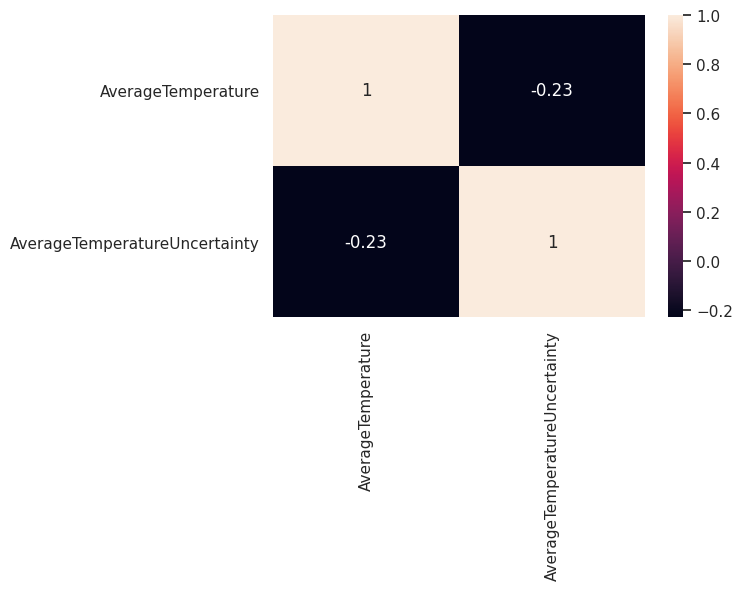

In [191]:
corr=temp_data.corr(method='pearson')
sns.heatmap(corr,annot=True)

##### Let us look at the histogram of the years and with missing data.

<AxesSubplot:xlabel='year', ylabel='count'>

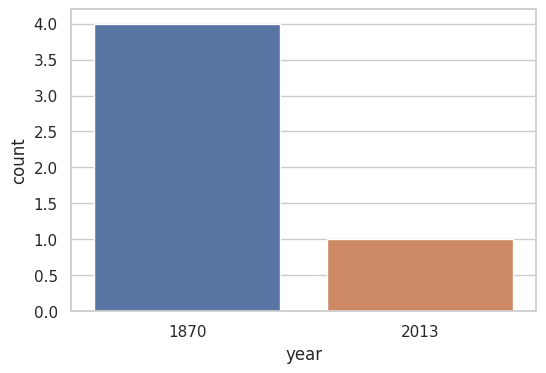

In [192]:
sns.countplot(x="year", data=missing_data)

<AxesSubplot:xlabel='month', ylabel='count'>

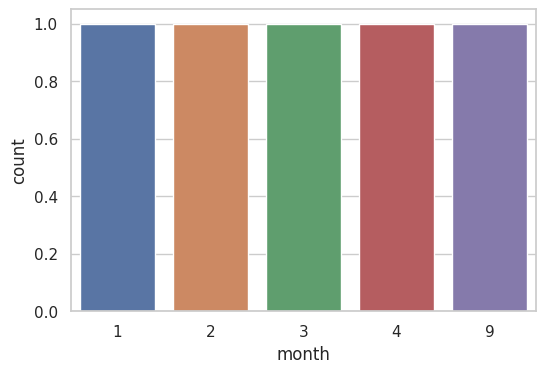

In [193]:
sns.countplot(x="month", data=missing_data)

In [194]:
print("Number of rows before removing missing data:",len(city_data))
city_data = city_data.dropna()
print("Number of rows after removing missing data:",len(city_data))

Number of rows before removing missing data: 2025
Number of rows after removing missing data: 2020


<AxesSubplot:xlabel='month', ylabel='temperature'>

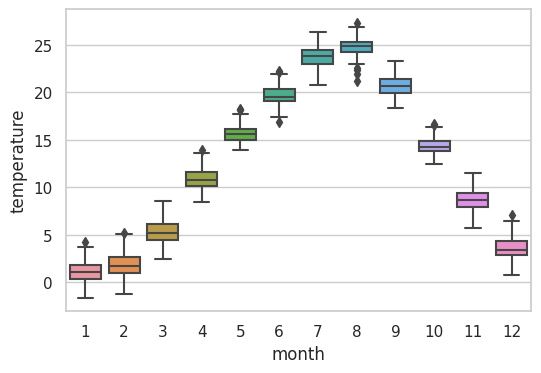

In [195]:
sns.boxplot(x="month", y="temperature", data=city_data)

<AxesSubplot:xlabel='year', ylabel='temperature'>

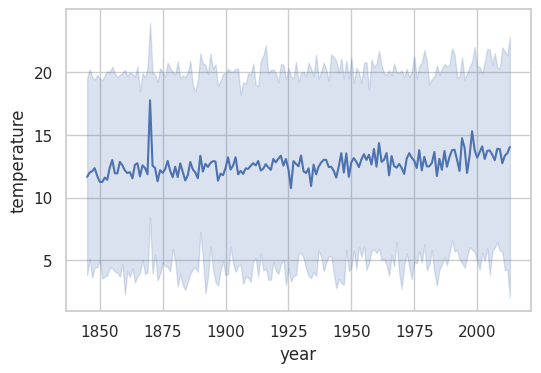

In [196]:
sns.lineplot(data=city_data, x="year", y="temperature", estimator=np.median)

##### Let us plot the mean temperature for all years in the dataset for the month of January , May and December

<AxesSubplot:xlabel='year', ylabel='temperature'>

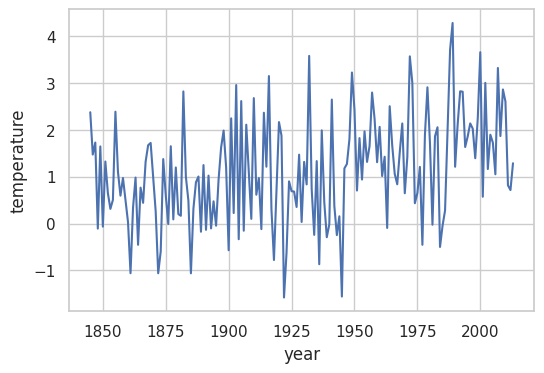

In [197]:
sns.lineplot(data=city_data[city_data["month"]==1], x="year", y="temperature")

<AxesSubplot:xlabel='year', ylabel='temperature'>

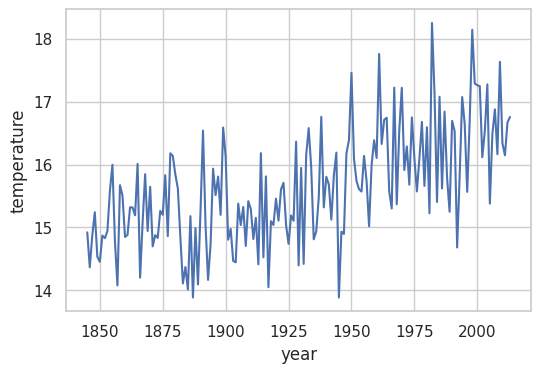

In [198]:
sns.lineplot(data=city_data[city_data["month"]==5], x="year", y="temperature")

<AxesSubplot:xlabel='year', ylabel='temperature'>

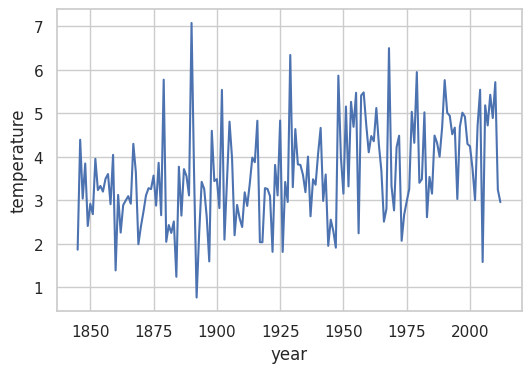

In [199]:
sns.lineplot(data=city_data[city_data["month"]==12], x="year", y="temperature")

##### We will plot the lineplot of mean deviation for each month in the dataset

<AxesSubplot:xlabel='month', ylabel='deviation'>

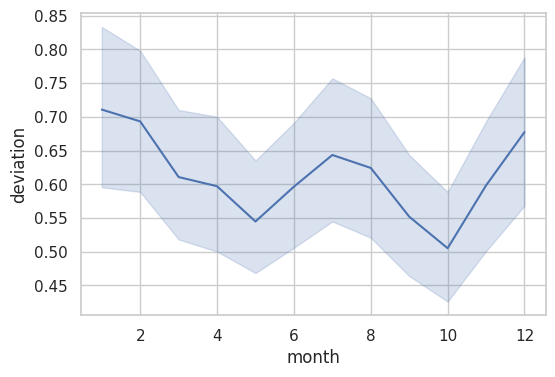

In [200]:
sns.lineplot(x="month", y="deviation", data=city_data)

##### We will plot the lineplot of mean deviation for Months January, May and December in the dataset

<AxesSubplot:xlabel='year', ylabel='deviation'>

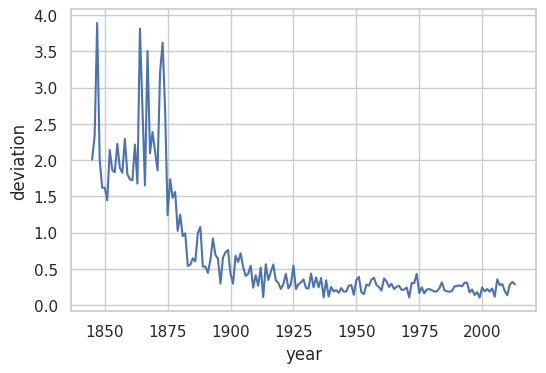

In [201]:
sns.lineplot(x="year", y="deviation", data=city_data[city_data["month"]==1])

<AxesSubplot:xlabel='year', ylabel='deviation'>

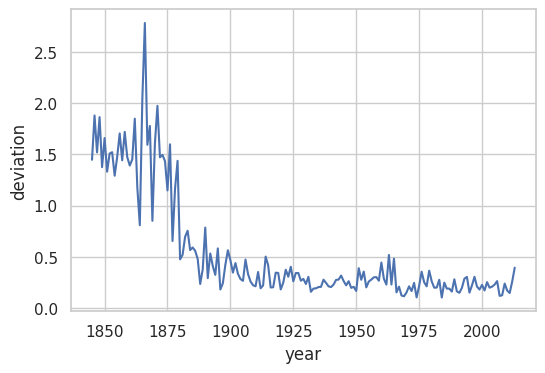

In [202]:
sns.lineplot(x="year", y="deviation", data=city_data[city_data["month"]==5])

<AxesSubplot:xlabel='year', ylabel='deviation'>

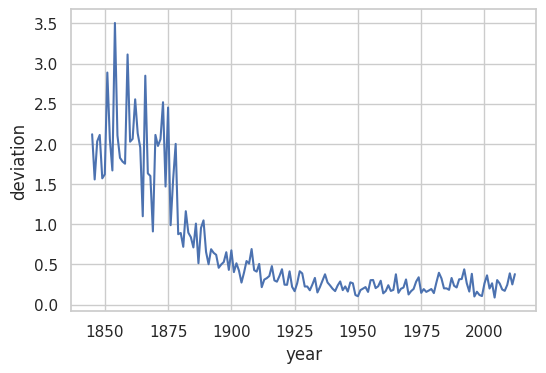

In [203]:
sns.lineplot(x="year", y="deviation", data=city_data[city_data["month"]==12])

##### We will plot the scatter to find the correlation between deviation and temperature

<AxesSubplot:xlabel='temperature', ylabel='deviation'>

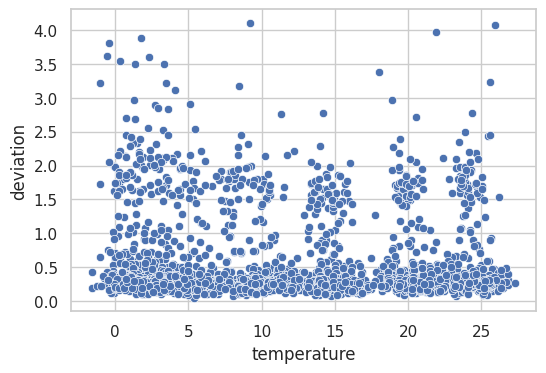

In [204]:
sns.scatterplot(data=city_data, x="temperature", y="deviation")

## PRINCIPAL COMPONENT ANALYSIS

### Dimensionilty reduction preprocessing techinque

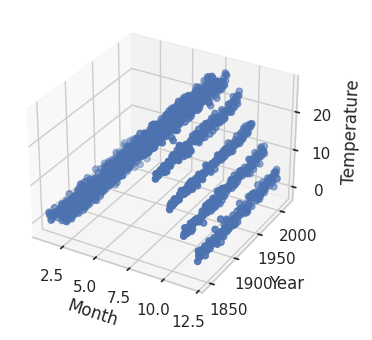

In [205]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(city_data['month'], city_data['year'], city_data['temperature'], marker='o')
ax.set_xlabel('Month')
ax.set_ylabel('Year')
ax.set_zlabel('Temperature')
plt.show()

<AxesSubplot:xlabel='year', ylabel='temperature'>

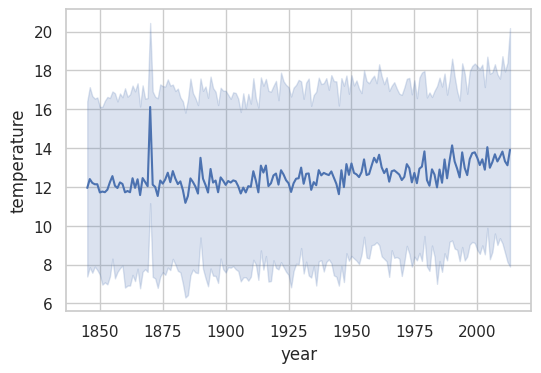

In [206]:
sns.lineplot(data=city_data, x="year", y="temperature")

> **PCA helps in visualizing the data closer. We can observe the rise in the temperature over the years from 1800s to 2000s**

count    2020.000000
mean       12.555998
std         8.230291
min        -1.580000
25%         4.514500
50%        13.111500
75%        20.169000
max        27.295000
Name: temperature, dtype: float64


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


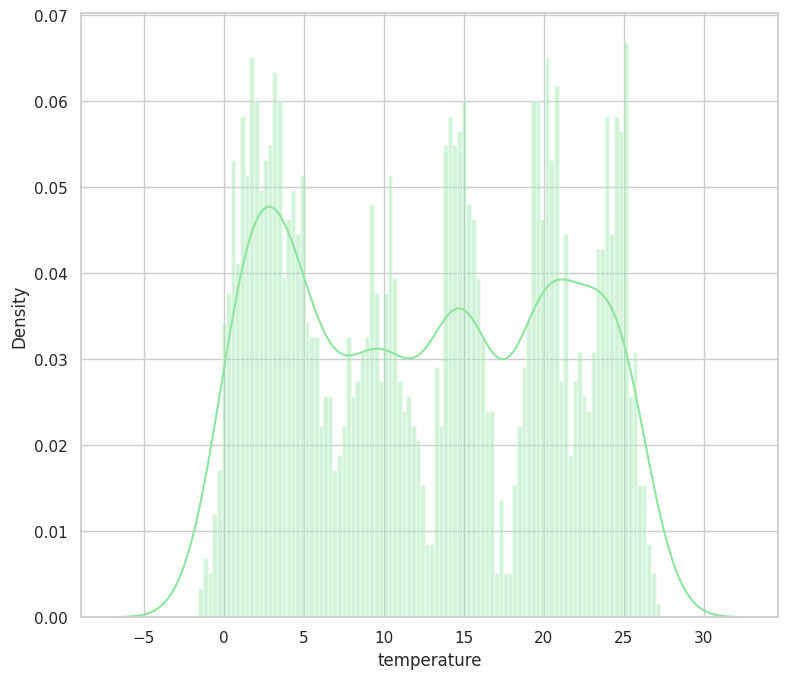

In [207]:
print(city_data['temperature'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(city_data['temperature'], color='g', bins=100, hist_kws={'alpha': 0.4});

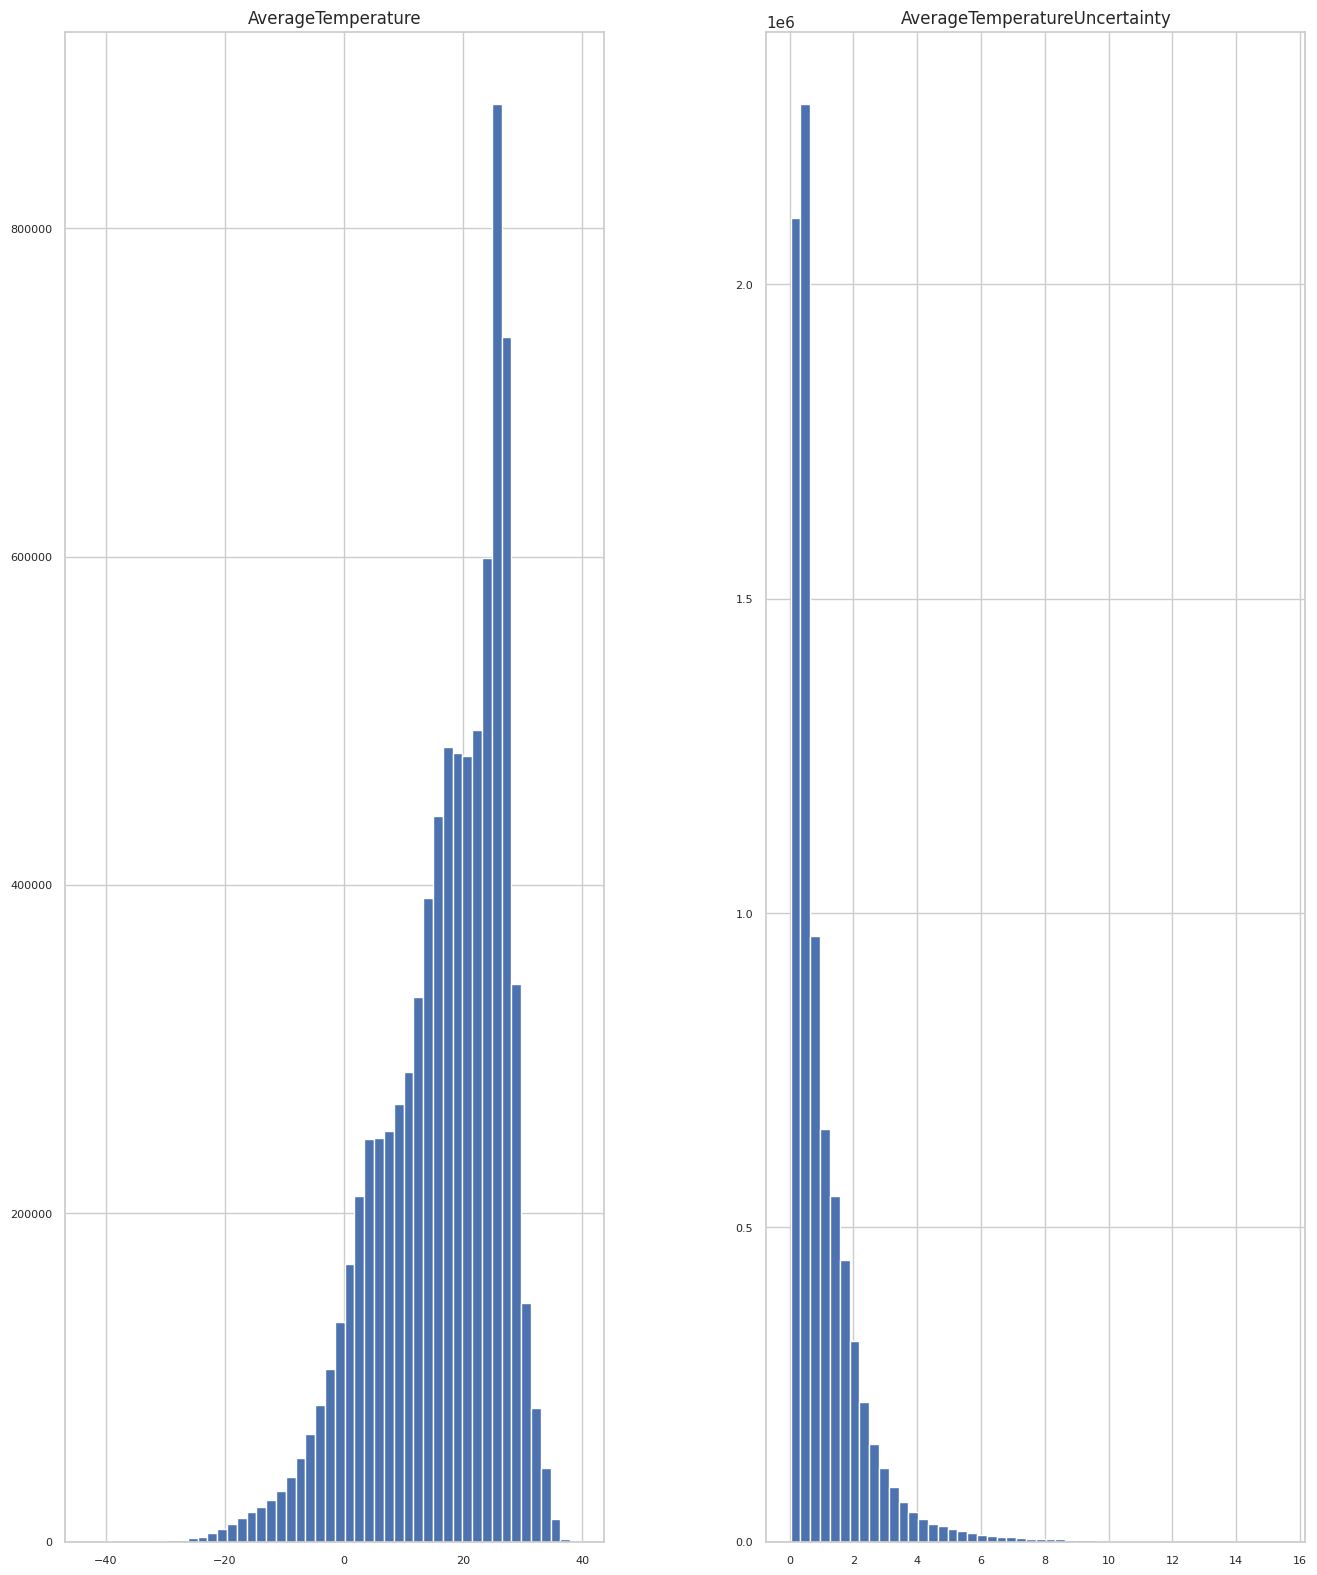

In [208]:
data = data.select_dtypes(include = ['float64', 'int64'])
data.head()
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);